# Preamble

In [ ]:
# preamble

base_directory_str = '/content/gdrive/My Drive/bio_NN_research/bio-learning/my_article_code/code_for_GitHub'


import numpy as np
import torch

import matplotlib.pyplot as plt

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

import pickle

from google.colab import drive


import numpy as np

import os

import time


import random

import shutil

!pip install import-ipynb
import import_ipynb


from datetime import datetime
from pytz import timezone    


drive.mount('/content/gdrive', force_remount=True)


if(os.path.isfile('/content/my_weight.ipynb')):
  os.remove('/content/my_weight.ipynb')


if(os.path.isfile('/content/my_coding.ipynb')):
  os.remove('/content/my_coding.ipynb')

if(os.path.isfile('/content/my_dataset.ipynb')):
  os.remove('/content/my_dataset.ipynb')
  

  

shutil.copy ( base_directory_str + '/my_modules/my_coding.ipynb'  , '/content/' )    

import my_coding


shutil.copy (  base_directory_str + '/my_modules/my_weight.ipynb'  , '/content/'  )    

import my_weight
# my_weight.dtype = torch.float32






shutil.copy ( base_directory_str + '/my_modules/my_dataset.ipynb'  , '/content/' )    

import my_dataset




if(os.path.isfile('/content/my_signal_processing.ipynb')):
  os.remove('/content/my_signal_processing.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_signal_processing.ipynb'  , '/content/' )    

import my_signal_processing



if(os.path.isfile('/content/my_model.ipynb')):
  os.remove('/content/my_model.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_model.ipynb'  , '/content/' )    

import my_model




base_directory_data_str =  base_directory_str + '/data/figure6_7_S2_data/'
base_directory_figure_str =  base_directory_str + '/figures/FA_reduction_and_WN_in_practice_MNIST/'



if not os.path.exists(  base_directory_data_str  ):
    os.makedirs( base_directory_data_str )
    print("data saving path did not exist and created")


if not os.path.exists(  base_directory_figure_str  ):
    os.makedirs( base_directory_figure_str )
    print("figure saving path did not exist and created")

dtype = torch.float
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)
plt.rcParams["mathtext.default"]= 'regular'
plt_fontsize_text_ = 9
plt_fontsize_title_ = 9
plt_fontsize_label_ = 7
plt_fontsize_legend_ = 9


my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]

cm_to_inch = 1/2.54  # centimeters in inches
figure_width1 = 9*cm_to_inch
figure_width2 = 19*cm_to_inch


import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)


def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive
importing Jupyter notebook from my_coding.ipynb
importing Jupyter notebook from my_weight.ipynb
importing Jupyter notebook from my_dataset.ipynb


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST_data/FashionMNIST/raw

importing Jupyter notebook from my_signal_processing.ipynb
importing Jupyter notebook from my_model.ipynb
cpu


# Load MNIST

In [ ]:
str_dir_data_mnist = "/content/gdrive/MyDrive/bio_NN_research/mnist_data/"

str_dir_data_mnist22 = base_directory_str + "/mnist_data/"

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

copytree(str_dir_data_mnist , str_dir_data_mnist22 )




In [ ]:
batch_size = 1000




# str_dir_data_mnist = base_directory_str + "/mnist_data/"

# def copytree(src, dst, symlinks=False, ignore=None):
#     for item in os.listdir(src):
#         s = os.path.join(src, item)
#         d = os.path.join(dst, item)
#         if os.path.isdir(s):
#             shutil.copytree(s, d, symlinks, ignore)
#         else:
#             shutil.copy2(s, d)
# copytree(str_dir_data_mnist , "/content/mnist_data" )



train_loader50 , test_loader50 , code_map50 , x_shape50   =   my_dataset.get_MNIST_dataset(  coding_layers = [10]  , ones_in_layes = [ 1 ]   , batch_size=batch_size , device = device  , flatten = True  , size=15  )

train_loader100 , test_loader100 , code_map100 , x_shape100 =   my_dataset.get_MNIST_dataset(  coding_layers = [100]  , ones_in_layes = [ 10 ]   , batch_size=batch_size , device = device  , flatten = True  , size=15  )




# Single run function

In [ ]:


def Single_run_function(str_dir_data_BASE  
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = True
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 10

            , label_smoothing = None
            , learning_method= 'BP-TRW'  
            , skip_existing = False
           ):

  batch_size = 1000
  train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                     , batch_size=batch_size , device = device  
                                                                                     , flatten = True  , size=15 , shuffle  = False , initial_shuffle = True )




  n_mini_batches =  len(train_loader)



  N_epoch = 100



  N_hidden = len(code_map[0][0])

  

  N_hidden_layers = 4

  N_input = 225

  N_output = N_hidden



  persistence = 1


  layers_info = []
  layers_info.append(N_input)

  for i in range(N_hidden_layers):
    layers_info.append(N_hidden)

  layers_info.append(N_output)

  print(layers_info)


  net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
  net.set_learning_rate(lr)

  if learning_method == 'BP-TRW'  : str_direction_disc = "FA(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"
  else:  str_direction_disc = "BP(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"


  if Normalize_Column_W_ != None and type(Normalize_Column_W_) == list  :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_[0] ).replace('.', 'd')+ "_" + str( Normalize_Column_W_[1] ).replace('.', 'd') + ")"
  elif Normalize_Column_W_ != None and  ( type(Normalize_Column_W_) == float or type(Normalize_Column_W_) == int  ) :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_ ).replace('.', 'd') + ")"
    Normalize_Column_W_ = [Normalize_Column_W_,Normalize_Column_W_]

  elif Normalize_Column_W_ == None :
    str_direction_disc = str_direction_disc + "(NoWN)"
  else: raise Exception("no defined condition")  


  if initial_B_normalization == True:
    str_direction_disc = str_direction_disc + "(IBN)"

  else:
    str_direction_disc = str_direction_disc + "(NoIBN)"



  if (B_Norm_Match_During  == True)  :
    str_direction_disc = str_direction_disc + "(DBNM)"
  elif (B_Norm_Match_During  == False) :
    str_direction_disc = str_direction_disc + "(NoBNM)"
  else: raise Exception("no defined condition")  

  if bias == True :
      str_direction_disc = str_direction_disc + "(Bias)"
  else:
    str_direction_disc = str_direction_disc + "(NoBias)"

  



  if label_smoothing != None : 
    str_direction_disc = str_direction_disc + "(LS_"+ str(label_smoothing[0]).replace('.', 'd')  + "_" + str(label_smoothing[1]).replace('.', 'd') + ")"

  # str_direction_disc = str_direction_disc + "(n_mini_batches_" + str(n_mini_batches)  + ")"


  print(str_direction_disc)
  str_t = str_direction_disc

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"
  if not os.path.exists(str_dir_data_BASE_exp):
      os.makedirs(str_dir_data_BASE_exp)
  else:
    print("##############  path exist #################\n\n######################")
    if os.path.isfile(str_dir_data_BASE_exp + "/test_accuracy_list_repeat.txt") and skip_existing==True:
      print("############## file exist #################\n\n######################\n")

      return str_t

  text_file = open( str_dir_data_BASE_exp + "description.txt" , "w")

  text_file.write(str_direction_disc)




  N_layers = len(layers_info)-1
  L_N_layers = N_layers
  print(N_layers)




  Save_dict = {


      "test_accuracy" : torch.zeros( [ N_repeat , N_epoch]  ),



      "angle_WFA_B" : torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),
 


      "angle_WFA_B_total" : torch.zeros( [ N_repeat , N_epoch*len(train_loader)*persistence ]  ),



      "angle_dWFA_B" :  torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),
      "angle_dWFA_dWFA_m1" :  torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),

      "angle_dWFA_dWFAsum" :  torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),

      "angle_dWFA_W" :  torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),



      "angle_dBiadBP_dBiadFA" :  torch.zeros( [N_layers +1, N_repeat , N_epoch*len(train_loader)*persistence ]  ),


      "angle_dWBP_dWFA" :  torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),



  
      "weight_norms"  : torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),

      "dW_FA_norms"  : torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),
      "dW_FA_norms_to_W_norms"  : torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),


      "delta_norms"  : torch.zeros( [N_layers+1 , N_repeat , N_epoch*len(train_loader)*persistence ]  ),
      "L_norms"  : torch.zeros( [N_layers+1 , N_repeat , N_epoch*len(train_loader)*persistence ]  ),

      "f_prime_norms"  : torch.zeros( [N_layers+1 , N_repeat , N_epoch*len(train_loader)*persistence ]  ),
      "f_prime_satur"  : torch.zeros( [N_layers+1 , N_repeat , N_epoch*len(train_loader)*persistence ]  ),




      
      "dW_BP_norms"  : torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )





  }



  for l in range(1,L_N_layers+1):
    Save_dict[ "data_delta_norms_" + str(l) ] = torch.zeros( [ 60000 , 3   , 6 ]  , device ='cpu')
                  



  for key in Save_dict:
    if type(Save_dict[key]) ==  type(torch.tensor([1])):
      Save_dict[key][:] =  float('nan')

  change = 0

  device0 = code_map[0].device
  my_coding.device = device0


  
  for rep in range(N_repeat):
   
    iteration_k = 0 
    print(rep)
    epoch_i0 = 0


    train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                    , batch_size=batch_size , device = device  
                                                                                    , flatten = True  , size=15 , shuffle  = False , initial_shuffle = True )



      
    train_dataset = train_loader.dataset


    train_tensor = train_dataset.tensors[0].to(device)  
    targets_tensor = train_dataset.tensors[1].to(device)  








    net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
    # print(net.bias_vec[-1])
    net.set_learning_rate(lr)

    
    
    if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list:  
      net.seed_norms(Normalize_Column_W_[0],Normalize_Column_W_[1])
      net.column_normalize_W()
      if initial_B_normalization == True: net.column_normalize_B()





    for epoch_i in range(N_epoch):
      ########################################################## TEST
      with torch.no_grad():

        acc=0
        ntotal = 0
        for (x_in, y_n) in test_loader:
          x_in = x_in.to(device)
          y_n =  y_n.to(device)
          net_last_layers = net.forward(x_in)
          acc = acc + y_n.shape[0]*my_coding.get_accuracy( y_n , code_map , [net_last_layers] , top=1 , coef=None ) 
          ntotal = ntotal + y_n.shape[0]

        acc = acc / ntotal

      Save_dict["test_accuracy"]  [rep,epoch_i] = acc*100

      if ( epoch_i%10 == 0 ):
        print("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)  )
        text_file.write("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)+'\n')
      


      ################################################################################### TEST
      sum_delta_W = []

      for i in range(len(net.W)):
        sum_delta_W.append( torch.zeros_like(net.W[i])   )





      if rep<3 and (epoch_i in [0,1,3,13,25,80]):
        targets_tensor= train_dataset.tensors[1].to(device0)
        train_tensor = train_dataset.tensors[0].to(device0) 



        L_f_k = net.forward(train_tensor)



        E_k  = targets_tensor - L_f_k 

        Delta_fa , Delta_bias_fa = net.BP_TRW(E_k) ########################################################################################## FA



        for l in range(1,L_N_layers+1):
          Save_dict[ "data_delta_norms_" + str(l) ] [ : , rep   , epoch_i0 ]  = net.delta_FA[l].norm(dim=1)





        epoch_i0 = epoch_i0 + 1






      for iter , (x_in, y_n) in enumerate( train_loader ):

        x_in = x_in.to(device)
        if label_smoothing != None : y_n =  y_n.to(device)*label_smoothing[0] + label_smoothing[1]
        else : y_n =  y_n.to(device)

      
        for persist_i in range(persistence):


          if learning_method == 'BP-TRW'  :
            for k in range(N_layers):
              Save_dict["angle_WFA_B"][  k  ,  rep  ,  iteration_k ] = my_weight.angle( net.W[k] , net.B[k].t()  )  
              

            B_T = []

            for l in range(len( net.B )):
              B_T.append(  net.B[l].t() )


            Save_dict["angle_WFA_B_total"][    rep  ,  iteration_k   ] = my_weight.angle(  torch.cat( net.W[1:]  ) ,  torch.cat( B_T[1:] )   )  
            

              
            for k in range(N_layers):
              Save_dict["weight_norms"][  k  ,  rep  ,  iteration_k  ] =  net.W[k] .norm()




          L_f = net.forward(x_in)


          E = y_n - L_f


          Delta_bp  , Delta_bias_bp = net.backprop(E)  ################################################################################### BP
          

          for l in range(N_layers):
            Save_dict["dW_BP_norms"][  l  ,  rep  ,  iteration_k  ] =  Delta_bp[l] .norm()





            


          if learning_method == 'BP-TRW'  :
            Delta_fa , Delta_bias_fa = net.BP_TRW(E) ########################################################################################## FA
          
            for i in range(len(net.W)):
              sum_delta_W[i] += Delta_fa[i]



            for k in range(N_layers):
              Save_dict["angle_dWFA_B"]  [  k  ,  rep  ,  iteration_k ] = my_weight.angle( Delta_fa[k] , net.B[k].t()  )  
              Save_dict["angle_dWFA_dWFAsum"]  [  k  ,  rep  ,  iteration_k ] = my_weight.angle( Delta_fa[k] , sum_delta_W[k] )  

              Save_dict["angle_dWFA_W"]  [  k  ,  rep  ,  iteration_k ] = my_weight.angle( Delta_fa[k] , net.W[k]  )  



            for l in range(N_layers):
              Save_dict["dW_FA_norms"][  l  ,  rep  ,  iteration_k  ] =  Delta_fa[l] .norm()


            for l in range(N_layers):
              Save_dict["dW_FA_norms_to_W_norms"][  l  ,  rep  ,  iteration_k  ] =  Delta_fa[l] .norm()  /  net.W[l].norm()


            for l in range(1,N_layers+1):
              Save_dict["delta_norms"][  l  ,  rep  ,  iteration_k  ] =  net.delta_FA[l] .norm()


            for l in range(0,N_layers+1):
              Save_dict["L_norms"][  l  ,  rep  ,  iteration_k  ] =  net.L[l] .norm()

            for l in range(1,N_layers+1):
              Save_dict["f_prime_norms"][  l  ,  rep  ,  iteration_k  ] =  net.derivative_activation1(net.Z[l]) .norm()

            for l in range(1,N_layers+1):
              Save_dict["f_prime_satur"][  l  ,  rep  ,  iteration_k  ] =  (net.derivative_activation1(net.Z[l]) > 0.01).sum()/(net.Z[l].shape[0]*net.Z[l].shape[1])



          if learning_method == 'BP-TRW'  :
  


  
              net.step_W(Delta_fa) ############################################################################################# STEP FA
              if bias==True :
                net.step_bias(Delta_bias_fa)

          else:
 
              net.step_W(Delta_bp) ############################################################################################# STEP BP
              if bias==True :
                net.step_bias(Delta_bias_bp)





          
          if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list :  net.column_normalize_W()
     


          if B_Norm_Match_During : net.match_B_norm_to_W_norm()


          if learning_method == 'BP-TRW'  :

            for l in range(N_layers):
              Save_dict["angle_dWBP_dWFA"][  l  ,  rep  ,  iteration_k   ] = my_weight.angle(   Delta_bp[l] , Delta_fa[l]   )  

            for l in range(1,N_layers+1):
              Save_dict["angle_dBiadBP_dBiadFA"][  l  ,  rep  ,  iteration_k   ] = my_weight.angle( Delta_bias_bp[l] , Delta_bias_fa[l]  )    
              

  


            







 
            
         


          iteration_k = iteration_k+1





########################################################## save data



  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"

  delete_key_list = []
  for key in Save_dict:
    if type(Save_dict[key]) ==  type(torch.tensor([1])):
      if torch.isnan(Save_dict[key]).all().item():
        delete_key_list.append(key)

  for key in delete_key_list:
    del  Save_dict[key] 




  str_direction = str_dir_data_BASE_exp + "Save_dict" + ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( Save_dict  , fp)


  return net 


# Run

## FA, No weight Normalization

In [ ]:
net  = Single_run_function(base_directory_data_str 
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
       
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 10
          
            , label_smoothing = None
            , learning_method= 'BP-TRW'  

           )

[225, 50, 50, 50, 50, 50]
FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)
##############  path exist #################

######################
5
0
epoch: 0,test_accu2: 0.10410000011324883
epoch: 10,test_accu2: 0.8208000004291535
epoch: 20,test_accu2: 0.8581000030040741
epoch: 30,test_accu2: 0.8802000045776367
epoch: 40,test_accu2: 0.8936999917030335
epoch: 50,test_accu2: 0.9006999969482422
epoch: 60,test_accu2: 0.9062999963760376
epoch: 70,test_accu2: 0.9111999988555908
epoch: 80,test_accu2: 0.916400009393692
epoch: 90,test_accu2: 0.918800002336502
1
epoch: 0,test_accu2: 0.10099999979138374
epoch: 10,test_accu2: 0.8410999953746796
epoch: 20,test_accu2: 0.8747999966144562
epoch: 30,test_accu2: 0.892300009727478
epoch: 40,test_accu2: 0.9000999987125397
epoch: 50,test_accu2: 0.9066999971866607
epoch: 60,test_accu2: 0.9121000111103058
epoch: 70,test_accu2: 0.9142000079154968
epoch: 80,test_accu2: 0.9174000024795532
epoch: 90,test_accu2: 0.9201000094413757
2
epoch: 0,test_accu2: 0.095799998939

## FA, Weight Normalization

In [ ]:
Single_run_function(base_directory_data_str 
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = True
          
            , Normalize_Column_W_ = [1,1]
            , lr = .0005
            , N_repeat = 10
          
            , label_smoothing = None
            , learning_method= 'BP-TRW'  

           )

[225, 50, 50, 50, 50, 50]
FA(W_50_lr_0d0005)(CWN_1_1)(IBN)(NoBNM)(Bias)
##############  path exist #################

######################
5
0
epoch: 0,test_accu2: 0.10819999948143959
epoch: 10,test_accu2: 0.8945000052452088
epoch: 20,test_accu2: 0.9166999936103821
epoch: 30,test_accu2: 0.9302000045776367
epoch: 40,test_accu2: 0.9371000051498413
epoch: 50,test_accu2: 0.9417000055313111
epoch: 60,test_accu2: 0.9446000099182129
epoch: 70,test_accu2: 0.9469000041484833
epoch: 80,test_accu2: 0.9477000057697296
epoch: 90,test_accu2: 0.9494999945163727
1
epoch: 0,test_accu2: 0.09780000075697899
epoch: 10,test_accu2: 0.8958000004291534
epoch: 20,test_accu2: 0.9183000087738037
epoch: 30,test_accu2: 0.9314999938011169
epoch: 40,test_accu2: 0.9381000101566315
epoch: 50,test_accu2: 0.9425999999046326
epoch: 60,test_accu2: 0.9461000025272369
epoch: 70,test_accu2: 0.9482999920845032
epoch: 80,test_accu2: 0.9505999982357025
epoch: 90,test_accu2: 0.9520000100135804
2
epoch: 0,test_accu2: 0.10439999

In [ ]:
Single_run_function(base_directory_data_str 
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
          
            , Normalize_Column_W_ = [1,1]
            , lr = .0005
            , N_repeat = 10
          
            , label_smoothing = None
            , learning_method= 'BP-TRW'  

           )

[225, 50, 50, 50, 50, 50]
FA(W_50_lr_0d0005)(CWN_1_1)(NoIBN)(NoBNM)(Bias)
##############  path exist #################

######################
5
0
epoch: 0,test_accu2: 0.0986000008881092
epoch: 10,test_accu2: 0.8270000040531158
epoch: 20,test_accu2: 0.8881999969482421
epoch: 30,test_accu2: 0.9045000016689301
epoch: 40,test_accu2: 0.9123999893665313
epoch: 50,test_accu2: 0.918699997663498
epoch: 60,test_accu2: 0.9231000006198883
epoch: 70,test_accu2: 0.9258000075817108
epoch: 80,test_accu2: 0.9290999948978425
epoch: 90,test_accu2: 0.9313000023365021
1
epoch: 0,test_accu2: 0.10040000006556511
epoch: 10,test_accu2: 0.8629000008106231
epoch: 20,test_accu2: 0.8925999999046326
epoch: 30,test_accu2: 0.9027999997138977
epoch: 40,test_accu2: 0.9124999880790711
epoch: 50,test_accu2: 0.9184000134468079
epoch: 60,test_accu2: 0.9236999988555908
epoch: 70,test_accu2: 0.9262999951839447
epoch: 80,test_accu2: 0.9300999999046325
epoch: 90,test_accu2: 0.9327000081539154
2
epoch: 0,test_accu2: 0.12349999

## BP, weight Normalization 

In [ ]:
Single_run_function(base_directory_data_str 
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = True
       
            , Normalize_Column_W_ = [1,1]
            , lr = .0004
            , N_repeat = 1
            
            , label_smoothing = None
            , learning_method= 'BP'  

           )

## BP, No weight Normalization

In [ ]:
Single_run_function(base_directory_data_str 
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
          
            , Normalize_Column_W_ = None
            , lr = .0004
            , N_repeat = 1
            
            , label_smoothing = None
            , learning_method= 'BP'  

           )

[225, 50, 50, 50, 50, 50]
BP(W_50_lr_0d0004)(NoWN)(NoIBN)(NoBNM)(Bias)
##############  path exist #################

######################
5
0
epoch: 0,test_accu2: 0.09800000116229057
epoch: 10,test_accu2: 0.9434999883174896
epoch: 20,test_accu2: 0.9590999901294708
epoch: 30,test_accu2: 0.9611999988555908
epoch: 40,test_accu2: 0.965499997138977
epoch: 50,test_accu2: 0.9633999943733216
epoch: 60,test_accu2: 0.9650999963283539
epoch: 70,test_accu2: 0.9678000032901763
epoch: 80,test_accu2: 0.9683000028133393
epoch: 90,test_accu2: 0.9676999926567078


# Histogram of $||\delta_{\ell+1,FA}[k]_{i,*}||_F$

torch.Size([60000, 3, 6])


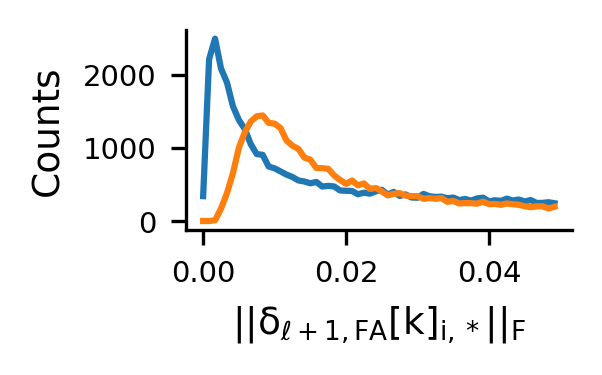

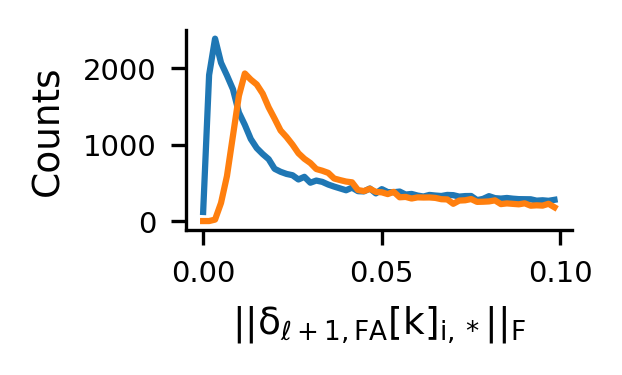

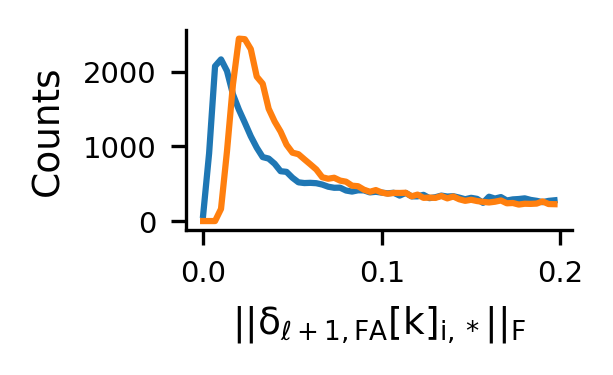

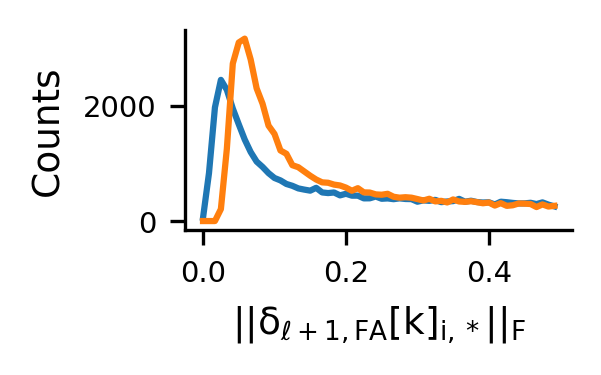

In [ ]:

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)/"


str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict_NO_WN = CPU_Unpickler(fp).load()



str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(CWN_1_1)(IBN)(NoBNM)(Bias)/"


str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict_WN = CPU_Unpickler(fp).load()







l=1


print(  Save_dict_NO_WN[ "data_delta_norms_" + str(l) ].shape )





# ################################################################

N_layers = 5

# N_repetition = angle_W_B_1.shape[1]

# length = angle_W_B_1.shape[-1]

# my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
# my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]







for l in range(2,N_layers+1):

  if l == 5:
    range0 = [0,0.5]
  if l == 4:
    range0 = [0,0.2]
  if l == 3:
    range0 = [0,0.1]
  if l == 2:
    range0 = [0,0.05]

  if l == 1:
    range0 = [0,0.025]

  
  figsize_ = (figure_width2/4.5 , figure_width1/4)
  plt.figure(num = None, figsize=figsize_, dpi=300, facecolor='w', edgecolor='k')

  y,x = np.histogram( Save_dict_NO_WN[ "data_delta_norms_" + str(l) ][:  , 0 , 3]  , bins = 60 , range = range0 )

  plt.plot(x[:-1] , y )

  y,x = np.histogram( Save_dict_WN[ "data_delta_norms_" + str(l) ][:  , 0 , 3]  , bins = 60 , range = range0 )

  plt.plot(x[:-1] , y )


  plt.xlabel("$||\delta_{\ell+1,FA}[k]_{i,*}||_F$", fontsize= plt_fontsize_text_   )
  plt.ylabel(r"Counts", fontsize= plt_fontsize_text_)


  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')
  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)


  plt.savefig( base_directory_figure_str +  "hist_error_norm_l_"  +str(l-1)  + ".jpg" , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001) 

  plt.show()
  # Save_dict_NO_WN[ "data_delta_norms_" + str(l) ]
  # Save_dict_WN[ "data_delta_norms_" + str(l) ]



# $||\Delta W_{\ell ,FA}||_F/||W_{\ell }||_F$

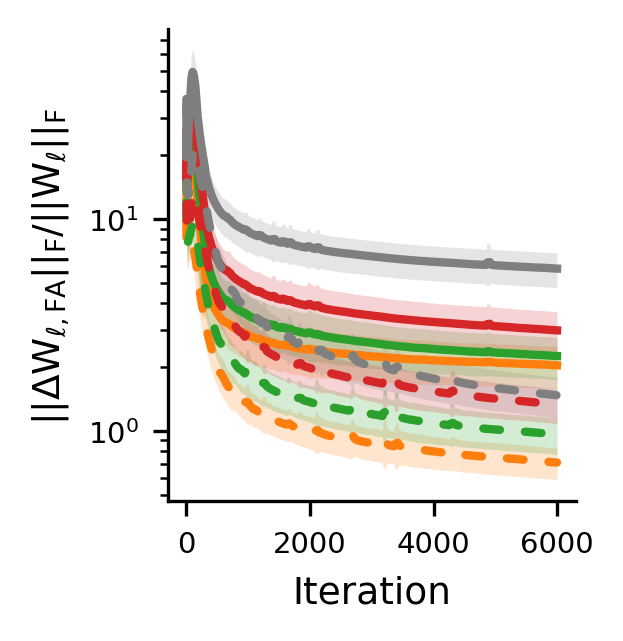

In [ ]:





str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)/"


str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict_NO_WN = CPU_Unpickler(fp).load()



str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(CWN_1_1)(IBN)(NoBNM)(Bias)/"


str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict_WN = CPU_Unpickler(fp).load()






figsize_ = (figure_width2/3.9*190/168/235*190,figure_width1/1.7)



linestyle_1 =  (0, (2, 3))
linestyle_2 =  '-'


# angle_W_B_1 = Save_dict_NO_WN["angle_WFA_B"]



angle_dW_BP_FA_1 = Save_dict_NO_WN["dW_FA_norms_to_W_norms"]



# angle_W_B_2 = Save_dict_WN["angle_WFA_B"]



angle_dW_BP_FA_2 = Save_dict_WN["dW_FA_norms_to_W_norms"]

      # "dW_FA_norms"  : torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),
      # "dW_BP_norms"  : torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )


################################################################

N_layers = angle_dW_BP_FA_1.shape[0]

N_repetition = angle_dW_BP_FA_1.shape[1]

length = angle_dW_BP_FA_1.shape[-1]

my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]






plt.figure(num = None, figsize=figsize_, dpi=300, facecolor='w', edgecolor='k')

for i in range(1,N_layers):
  x = angle_dW_BP_FA_2[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()

  linewidth_ = 2

  # if i ==0: linewidth_ = 2.5
  # if i ==1: linewidth_ = 1.3


  filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
  plt.plot( filtered_mean   ,  linestyle = linestyle_2  , dash_capstyle='round'   , color = my_cycle[i] , linewidth=linewidth_  ) 
  filtered_mean_1 , filtered_std_1 =  my_signal_processing.sliding_window(x_std , 60)
  plt.fill_between(  range(length)   , filtered_mean-filtered_mean_1 , filtered_mean+filtered_mean_1  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  


  # x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  # x_mean  = x.mean(dim=0).squeeze()
  # x_std  = x.std(dim=0).squeeze()

  # plt.plot( x_mean  ,  linestyle = linestyle_2  , dash_capstyle='round' ,label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] , linewidth=2 ) 
  # plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  



for i in range(1,N_layers):
  x = angle_dW_BP_FA_1[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()


  linewidth_ = 2
  # if i ==0: linewidth_ = 3

  filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
  plt.plot( filtered_mean  ,  linestyle = linestyle_1  , dash_capstyle='round'  , color = my_cycle[i] , linewidth=linewidth_  ) 
  filtered_mean_1 , filtered_std_1 =  my_signal_processing.sliding_window(x_std , 60)
  plt.fill_between(  range(length)   , filtered_mean-filtered_mean_1 , filtered_mean+filtered_mean_1  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  




  # x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  # x_mean  = x.mean(dim=0).squeeze()
  # x_std  = x.std(dim=0).squeeze()

  # plt.plot( x_mean  ,  linestyle = linestyle_1  , dash_capstyle='round' ,label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] , linewidth=2 ) 
  # plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  



plt.xlabel("Iteration", fontsize= plt_fontsize_text_   )
plt.ylabel(r"$||\Delta W_{\ell ,FA}||_F/||W_{\ell }||_F$", fontsize= plt_fontsize_text_)




ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
ax.tick_params(axis='y', labelsize=plt_fontsize_label_)


# plt.xscale('log' )
plt.yscale('log')

# import matplotlib.ticker

# plt.xlim([1,7001])

# locmaj = matplotlib.ticker.LogLocator(base=10,numticks=6) 
# ax.xaxis.set_major_locator(locmaj)

# locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9) ,numticks=6)
# ax.xaxis.set_minor_locator(locmin)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())


# locmin = matplotlib.ticker.LogLocator(base=10,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9))


# locmin = matplotlib.ticker.LogLocator(base=10, subs=( 0.1,0.2 )   )

# locmin = matplotlib.ticker.LogLocator(base=10.0 ,  numticks=4)

# ax.xaxis.set_minor_locator(locmin)

# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())


# plt.tick_params(axis='x', which='major')

# plt.tick_params(axis='x', which='minor')
# 
# ax.loglog()


# plt.minorticks_on()


# plt.ylim(16,99)
# plt.yticks( [ 18  , 30 , 45 , 60  , 75, 90]  ,  [ '0'  , '30' , '45' , '60'   , '75' , '90'] )
plt.savefig( base_directory_figure_str +  'delta_w_norm_to_W_norm.jpg' , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001) 

plt.show()




####################################################################################################################################################################################################
##################################################################################################



# # $\Delta W_{\ell } \measuredangle B_{\ell }^T $

# $W_{\ell } \measuredangle B_{\ell }^T $ and $\Delta W_{\ell ,FA} \measuredangle \Delta W_{\ell ,BP} $  

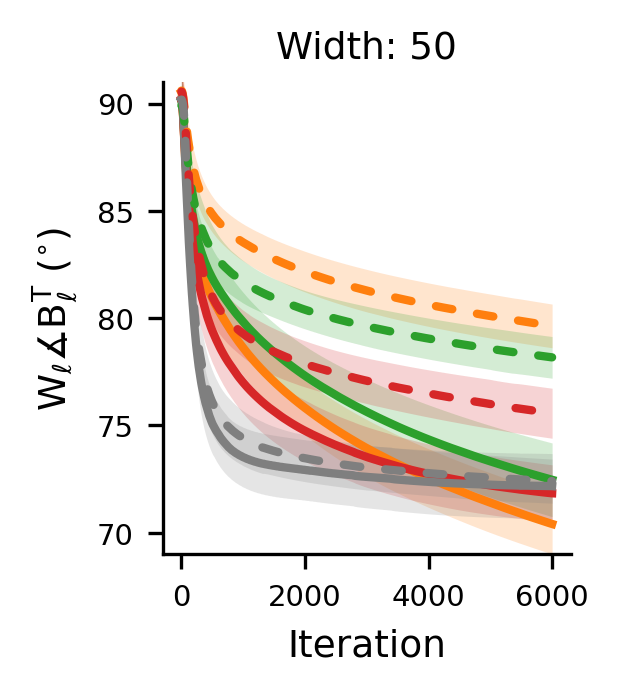

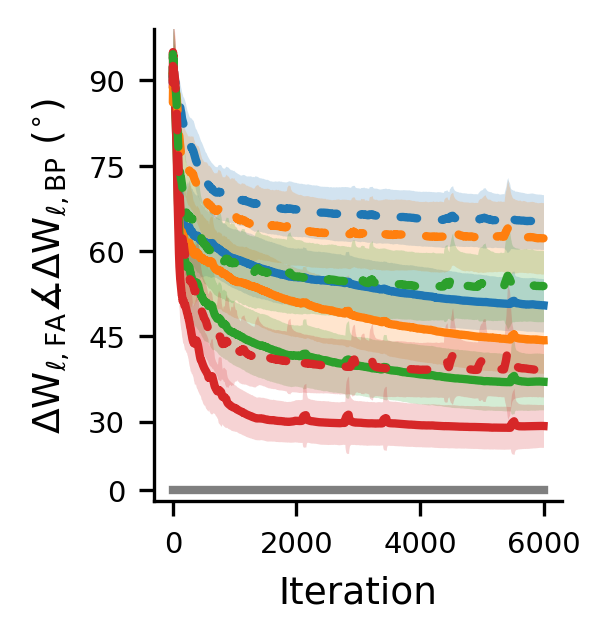

In [ ]:



str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)(n_mini_batches_60)/"


str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict_NO_WN = CPU_Unpickler(fp).load()



str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(CWN_1_1)(IBN)(NoBNM)(Bias)/"


str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict_WN = CPU_Unpickler(fp).load()





figsize_ = (figure_width2/3.9*190/168/235*190,figure_width1/1.7)



linestyle_1 =  (0, (2, 3))
linestyle_2 =  '-'


angle_W_B_1 = Save_dict_NO_WN["angle_WFA_B"]



angle_dW_BP_FA_1 = Save_dict_NO_WN["angle_dWBP_dWFA"]



angle_W_B_2 = Save_dict_WN["angle_WFA_B"]



angle_dW_BP_FA_2 = Save_dict_WN["angle_dWBP_dWFA"]


################################################################

N_layers = angle_W_B_1.shape[0]

N_repetition = angle_W_B_1.shape[1]

length = angle_W_B_1.shape[-1]

my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]


plt.figure(num = None, figsize=figsize_, dpi=300, facecolor='w', edgecolor='k')


for i in range(1,N_layers):
  x = angle_W_B_2[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()

  plt.plot( x_mean  ,  linestyle = linestyle_2  , dash_capstyle='round' ,label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] , linewidth=2 ) 
  plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  



for i in range(1,N_layers):
  x = angle_W_B_1[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()

  plt.plot( x_mean  , linestyle = linestyle_1 , dash_capstyle='round' , label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] , linewidth=2 ) 
  plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  


plt.xlabel("Iteration", fontsize= plt_fontsize_text_)
plt.ylabel(r"$W_{\ell } \measuredangle B_{\ell }^T \ (^{\circ})$", fontsize= plt_fontsize_text_)




plt.title("Width: 50"    , fontsize= plt_fontsize_text_   )




ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
ax.tick_params(axis='y', labelsize=plt_fontsize_label_)

plt.ylim(69,91)
plt.yticks(list(range(70,95,5)))

plt.savefig( base_directory_figure_str +  'W_B_50_with_normalization.jpg' , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001) 


plt.show()





####################################################################################################################################################################################################
##################################################################################################





plt.figure(num = None, figsize=figsize_, dpi=300, facecolor='w', edgecolor='k')

for i in range(0,N_layers-1):
  x = angle_dW_BP_FA_2[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()

  filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
  plt.plot( filtered_mean   ,  linestyle = linestyle_2  , dash_capstyle='round'   , color = my_cycle[i] , linewidth=2  ) 
  filtered_mean_1 , filtered_std_1 =  my_signal_processing.sliding_window(x_std , 60)
  plt.fill_between(  range(length)   , filtered_mean-filtered_mean_1 , filtered_mean+filtered_mean_1  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  




for i in range(0,N_layers-1):
  x = angle_dW_BP_FA_1[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()
  
  filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
  plt.plot( filtered_mean  ,  linestyle = linestyle_1  , dash_capstyle='round'  , color = my_cycle[i] , linewidth=2  ) 
  filtered_mean_1 , filtered_std_1 =  my_signal_processing.sliding_window(x_std , 60)
  plt.fill_between(  range(length)   , filtered_mean-filtered_mean_1 , filtered_mean+filtered_mean_1  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  




i = i+1
plt.plot( [0 , length] , [18,18] ,  linestyle = linestyle_2  , dash_capstyle='round'  , color = my_cycle[i] , linewidth=2  ) 



plt.xlabel("Iteration", fontsize= plt_fontsize_text_   )
plt.ylabel(r"$\Delta W_{\ell ,FA} \measuredangle \Delta W_{\ell ,BP} \ (^{\circ})$", fontsize= plt_fontsize_text_)




ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
plt.ylim(16,99)
plt.yticks( [ 18  , 30 , 45 , 60  , 75, 90]  ,  [ '0'  , '30' , '45' , '60'   , '75' , '90'] )
plt.savefig( base_directory_figure_str +  'dw_FA_BP_50_with_normalization.jpg' , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001) 

plt.show()


####################################################################################################################################################################################################
##################################################################################################



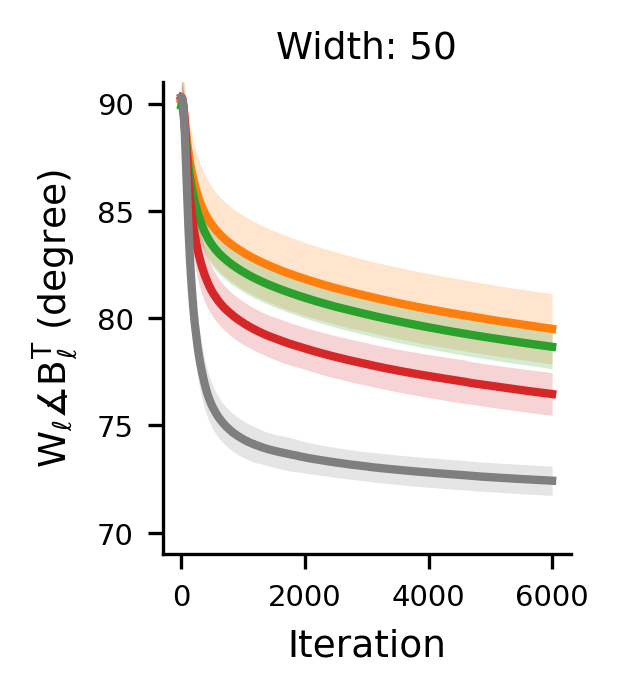

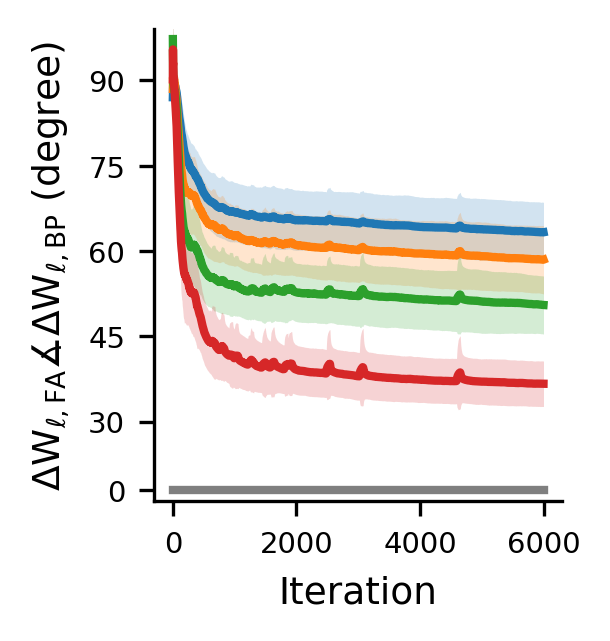

In [ ]:




figsize_ = (figure_width2/3.9*190/168/235*190,figure_width1/1.7)



linestyle_1 =   '-'
# linestyle_2 =  '-'


str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(IBN)(NoBNM)(Bias)/" 


str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_1 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_1= pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_1 = pickle.load(fp) 


str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(CWN_1_1)(IBN)(NoBNM)(Bias)/" 


str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_2 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_2 = pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_2 = pickle.load(fp) 


################################################################

N_layers = angle_W_B_1.shape[0]

N_repetition = angle_W_B_1.shape[1]

length = angle_W_B_1.shape[-1]

my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]


plt.figure(num = None, figsize=figsize_, dpi=300, facecolor='w', edgecolor='k')


# for i in range(1,N_layers):
  # x = angle_W_B_2[i,:,:]

  # x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  # x_mean  = x.mean(dim=0).squeeze()
  # x_std  = x.std(dim=0).squeeze()

  # plt.plot( x_mean  ,  linestyle = linestyle_2  , dash_capstyle='round' ,label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] , linewidth=2 ) 
  # plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  



for i in range(1,N_layers):
  x = angle_W_B_1[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()

  plt.plot( x_mean  , linestyle = linestyle_1 , dash_capstyle='round' , label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] , linewidth=2 ) 
  plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  


plt.xlabel("Iteration", fontsize= plt_fontsize_text_)
plt.ylabel(r"$W_{\ell } \measuredangle B_{\ell }^T \ (^{\circ})$", fontsize= plt_fontsize_text_)




plt.title("Width: 50"    , fontsize= plt_fontsize_text_   )




ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
ax.tick_params(axis='y', labelsize=plt_fontsize_label_)

plt.ylim(69,91)
plt.yticks(list(range(70,95,5)))

plt.savefig( base_directory_figure_str +  'W_B_50.jpg' , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001) 


plt.show()





####################################################################################################################################################################################################
##################################################################################################





plt.figure(num = None, figsize=figsize_, dpi=300, facecolor='w', edgecolor='k')

# for i in range(0,N_layers-1):
  # x = angle_dW_BP_FA_2[i,:,:]

  # x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  # x_mean  = x.mean(dim=0).squeeze()
  # x_std  = x.std(dim=0).squeeze()

  # filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
  # plt.plot( filtered_mean   ,  linestyle = linestyle_2  , dash_capstyle='round'   , color = my_cycle[i] , linewidth=2  ) 
  # filtered_mean_1 , filtered_std_1 =  my_signal_processing.sliding_window(x_std , 60)
  # plt.fill_between(  range(length)   , filtered_mean-filtered_mean_1 , filtered_mean+filtered_mean_1  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  




for i in range(0,N_layers-1):
  x = angle_dW_BP_FA_1[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()
  
  filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
  plt.plot( filtered_mean  ,  linestyle = linestyle_1  , dash_capstyle='round'  , color = my_cycle[i] , linewidth=2  ) 
  filtered_mean_1 , filtered_std_1 =  my_signal_processing.sliding_window(x_std , 60)
  plt.fill_between(  range(length)   , filtered_mean-filtered_mean_1 , filtered_mean+filtered_mean_1  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  




i = i+1
plt.plot( [0 , length] , [18,18] ,  linestyle = linestyle_2  , dash_capstyle='round'  , color = my_cycle[i] , linewidth=2  ) 



plt.xlabel("Iteration", fontsize= plt_fontsize_text_   )
plt.ylabel(r"$\Delta W_{\ell ,FA} \measuredangle \Delta W_{\ell ,BP} \ (^{\circ})$", fontsize= plt_fontsize_text_)




ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
plt.ylim(16,99)
plt.yticks( [ 18  , 30 , 45 , 60  , 75, 90]  ,  [ '0'  , '30' , '45' , '60'   , '75' , '90'] )
plt.savefig( base_directory_figure_str +  'dw_FA_BP_50.jpg' , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001) 

plt.show()


####################################################################################################################################################################################################
##################################################################################################



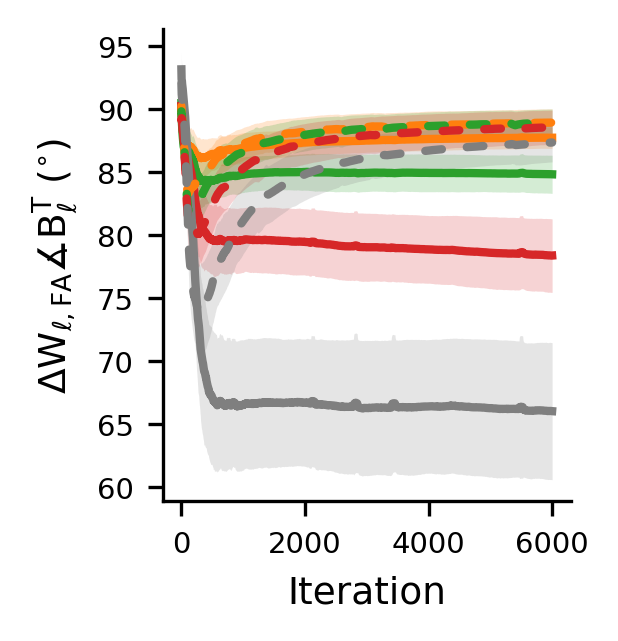

In [ ]:



str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)/"


str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict_NO_WN = CPU_Unpickler(fp).load()



str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(CWN_1_1)(IBN)(NoBNM)(Bias)/"


str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict_WN = CPU_Unpickler(fp).load()





figsize_ = (figure_width2/3.9*190/168/235*190,figure_width1/1.7)



linestyle_1 =  (0, (2, 3))
linestyle_2 =  '-'


angle_W_B_1 = Save_dict_NO_WN["angle_dWFA_W"]



angle_dW_BP_FA_1 = Save_dict_NO_WN["angle_dWFA_W"]



angle_W_B_2 = Save_dict_WN["angle_dWFA_W"]



angle_dW_BP_FA_2 = Save_dict_WN["angle_dWFA_W"]


################################################################


N_layers = angle_W_B_1.shape[0]

N_repetition = angle_W_B_1.shape[1]

length = angle_W_B_1.shape[-1]

my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]



####################################################################################################################################################################################################
##################################################################################################





plt.figure(num = None, figsize=figsize_, dpi=300, facecolor='w', edgecolor='k')

for i in range(1,N_layers):
  x = angle_dW_BP_FA_2[i,:,0:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()

  filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
  plt.plot( filtered_mean   ,  linestyle = linestyle_2  , dash_capstyle='round'   , color = my_cycle[i] , linewidth=2  ) 
  filtered_mean_1 , filtered_std_1 =  my_signal_processing.sliding_window(x_std , 60)
  plt.fill_between(  range(len(filtered_mean))   , filtered_mean-filtered_mean_1 , filtered_mean+filtered_mean_1  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  




for i in range(1,N_layers):
  x = angle_dW_BP_FA_1[i,:,0:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()
  
  filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
  plt.plot( filtered_mean  ,  linestyle = linestyle_1  , dash_capstyle='round'  , color = my_cycle[i] , linewidth=2  ) 
  filtered_mean_1 , filtered_std_1 =  my_signal_processing.sliding_window(x_std , 60)
  plt.fill_between(  range(len(filtered_mean))   , filtered_mean-filtered_mean_1 , filtered_mean+filtered_mean_1  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  




# i = i+1
# plt.plot( [0 , length] , [18,18] ,  linestyle = linestyle_2  , dash_capstyle='round'  , color = my_cycle[i] , linewidth=2  ) 



plt.xlabel("Iteration", fontsize= plt_fontsize_text_   )
plt.ylabel(r"$\Delta W_{\ell ,FA} \measuredangle B^T_{\ell} \ (^{\circ})$", fontsize= plt_fontsize_text_)




ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
# plt.xscale('log')

# plt.ylim(16,99)
# plt.yticks( [ 18  , 30 , 45 , 60  , 75, 90]  ,  [ '0'  , '30' , '45' , '60'   , '75' , '90'] )
# plt.savefig( base_directory_figure_str +  'dW_B.jpg' , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001) 

plt.show()


####################################################################################################################################################################################################
##################################################################################################



# $\Vert  W_\ell[k] \Vert_F / \Vert  W_\ell[0] \Vert_F$

torch.Size([5, 10, 6000])


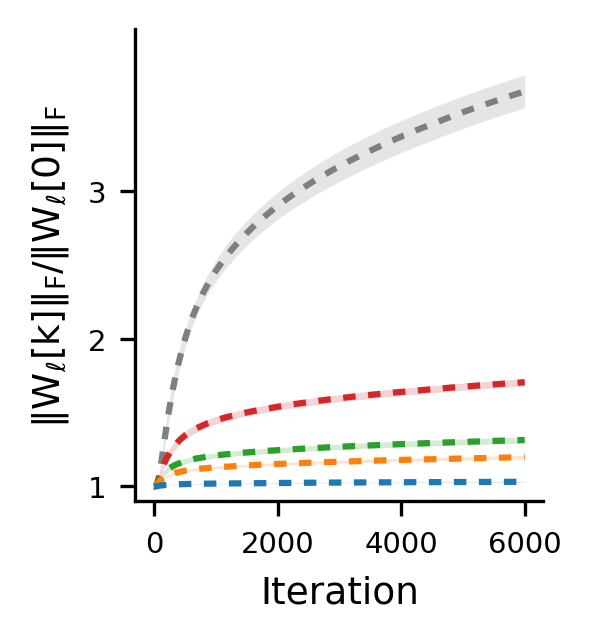

In [ ]:

linestyle_1 =   (0, (2, 2))



str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(IBN)(NoBNM)(Bias)/" 


# str_direction = str_dir_data_BASE + "dW_norms_BP" +  ".txt"

# with open( str_direction , "rb") as fp:   #Pickling
#   dW_norms_BP = pickle.load(fp)





# str_direction = str_dir_data_BASE + "dW_norms" +  ".txt"

# with open( str_direction , "rb") as fp:   #Pickling
#   dW_norms_FA = pickle.load(fp)





str_direction = str_dir_data_BASE + "weight_norms" +  ".txt"




with open( str_direction , "rb") as fp:   #Pickling
  W_norms = pickle.load(fp)


print(W_norms.shape)

figsize_ = (figure_width2/3.9*190/168/235*190,figure_width1/1.7)

plt.figure(num = None, figsize=figsize_, dpi=300, facecolor='w', edgecolor='k')


for l in reversed( range(W_norms.shape[0]) ):
  W_norms_l = W_norms[l,:,:]
  # print( W_norms_l.shape  )

  W_norms_l = torch.div( W_norms_l , W_norms_l [:,0].view([W_norms_l.shape[0],1]))


  # print( W_norms_l.shape  )


  plt.plot( range(length)   , W_norms_l.mean(dim=0)  , linestyle = linestyle_1 , label = r"$\ell\ " + str(l) + "$"  , linewidth = 1.5 , color= my_cycle[l] ) 




  x = W_norms_l

  # x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()

  # filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
  # plt.plot( filtered_mean   ,  linestyle = linestyle_2  , dash_capstyle='round' , label = r'$\Delta W_{' + str(i) +  ',FA} \measuredangle \Delta W_{'+ str(i) + ',BP}$'  , color = my_cycle[i] , linewidth=2  ) 
  # filtered_mean_1 , filtered_std_1 =  my_signal_processing.x_mean(x_std , 60)
  plt.fill_between(  range(length)   , x_mean-x_std , x_mean+x_std  , color = my_cycle2[l] , alpha=0.2 , linewidth=0    )  






plt.xlabel("Iteration", fontsize= plt_fontsize_text_)
plt.ylabel(r"$\Vert  W_\ell[k] \Vert_F / \Vert  W_\ell[0] \Vert_F$", fontsize= plt_fontsize_text_)




ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
ax.tick_params(axis='y', labelsize=plt_fontsize_label_)

plt.ylim(0.9,4.1)
plt.yticks([1,2,3])





plt.savefig( base_directory_figure_str +  'W_norm_no_norm.jpg' , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001) 

plt.show()



# Test error

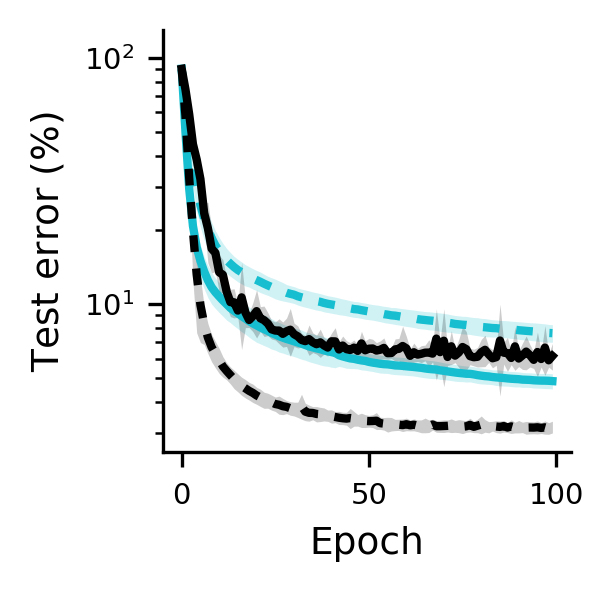

In [ ]:


linestyle_1 =  (0, (2, 2))
linestyle_2 =  '-'

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(IBN)(DBNM)(Bias)/" 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_1 = pickle.load(fp) 


str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(IBN)(NoBNM)(Bias)/" 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_2 = pickle.load(fp) 


str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(WWN_7d07)(IBN)(NoBNM)(Bias)/" 


str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_3 = pickle.load(fp) 


str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(CWN_1_1)(IBN)(NoBNM)(Bias)/" 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_4 = pickle.load(fp) 




str_dir_data_BASE = base_directory_data_str + "BP(W_50_lr_0d0003)(NoWN)(IBN)(NoBNM)(Bias)/" 
str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  testaccurac_1_bp = pickle.load(fp)
  
  

str_dir_data_BASE = base_directory_data_str + "BP(W_50_lr_0d0003)(CWN_0d6_0d6)(IBN)(NoBNM)(Bias)/" 
str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  testaccurac_2_bp = pickle.load(fp)




test_accuracy_list_repeat_1 = 100-test_accuracy_list_repeat_1
test_accuracy_list_repeat_2 =100-test_accuracy_list_repeat_2
test_accuracy_list_repeat_3 =100-test_accuracy_list_repeat_3
test_accuracy_list_repeat_4 =100-test_accuracy_list_repeat_4

testaccurac_1_bp = 100-testaccurac_1_bp
testaccurac_2_bp = 100-testaccurac_2_bp


N_epoch = test_accuracy_list_repeat_1.shape[1]


figsize_ = (figure_width2/3.9*190/168/235*190,figure_width1/1.9)


plt.figure(num = None, figsize= figsize_ , dpi=300, facecolor='w', edgecolor='k')

i = 0
# x = test_accuracy_list_repeat_1
# SEM = test_accuracy_list_repeat_1.shape[0]
# SEM = np.sqrt(SEM)
# x_mean = x.mean(dim=0) 
# plt.plot( x_mean  , '-'  , color = my_cycle[i] , linewidth=2  , label = r"BP-TRW, Matching $\Vert B_{\ell} \Vert _ F$ with $\Vert W_{\ell} \Vert _ F$"   )   
# x_sem = x.std(dim=0)/SEM 
# plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[i] , alpha=0.2 , linewidth=0)
# i = i +1


x = test_accuracy_list_repeat_2
SEM = test_accuracy_list_repeat_2.shape[0]
SEM = np.sqrt(SEM)
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , linestyle = linestyle_1  , color = my_cycle[5] , linewidth=2  , label = r"BP-TRW, No WN"   )   
x_sem = x.std(dim=0)
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[5] , alpha=0.2 , linewidth=0)
i = i +1



x = test_accuracy_list_repeat_4
SEM = test_accuracy_list_repeat_4.shape[0]
SEM = np.sqrt(SEM)
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , linestyle = linestyle_2  , color = my_cycle[5] , linewidth=2  , label = r"BP-TRW, WN" )   
x_sem = x.std(dim=0)
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[5] , alpha=0.2 , linewidth=0)
i = i +1



# x = test_accuracy_list_repeat_3
# SEM = test_accuracy_list_repeat_3.shape[0]
# SEM = np.sqrt(SEM)
# x_mean = x.mean(dim=0) 
# plt.plot( x_mean  , '-'  , color = my_cycle[i] , linewidth=2  , label = r"BP-TRW, $\Vert W_{\ell} \Vert _ F$ normalization"   )   
# x_sem = x.std(dim=0)/SEM 
# plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[i] , alpha=0.2 , linewidth=0)
# i = i +1




x = testaccurac_1_bp[:,0:100]
SEM = testaccurac_1_bp.shape[0]
SEM = np.sqrt(SEM)
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , linestyle = linestyle_1  , color = 'k', linewidth=2  , label = r"BP, No WN"   )   
x_sem = x.std(dim=0)
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = 'k' , alpha=0.2 , linewidth=0)
i = i +1

x = testaccurac_2_bp[:,0:100]
SEM = testaccurac_2_bp.shape[0]
SEM = np.sqrt(SEM)
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , linestyle = linestyle_2  , color = 'k' , linewidth=2  , label = r"BP, WN" )   
x_sem = x.std(dim=0)
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = 'k' , alpha=0.2 , linewidth=0)
i = i +1



# plt.plot( angle_dW1_B_list  , '-' , label = "angle_dW1_B_list"  ) 
plt.xlabel("Epoch", fontsize= plt_fontsize_text_   )
plt.ylabel(r"$Test\ error\ (\%)$", fontsize= plt_fontsize_text_)


# leg = plt.legend( loc= 'upper right'  , fontsize = plt_fontsize_text_)

# for line in leg.get_lines():
#     line.set_linewidth(3.0)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
plt.ylim(2.5,130)
plt.yscale('log')
dir_str = base_directory_figure_str + "combined_test_errors2.jpg"
plt.savefig( dir_str , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 
plt.show( )
